# Lecture 9 - Partial dependence plots (PDP) in R on COVID data


## Set up the data with numeric values

In [5]:
library(magrittr)

full_data<-sdgm::oncovid %>% dplyr::filter(age_group != "Not Reported")
full_data$age_group<-as.numeric(full_data$age_group)
full_data$gender<-as.numeric(full_data$gender)

head(full_data)

,case_status,age_group,gender,date_reported,exposure,health_region
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
1,0,4,1,285.4583,Close Contact,York Region Public Health Services
2,0,1,2,297.4583,Close Contact,York Region Public Health Services
3,0,5,2,274.4583,Not Reported,Peel Public Health
4,0,2,1,260.4583,Close Contact,Halton Region Health Department
5,0,3,1,307.5000,Not Reported,Wellington-Dufferin-Guelph Public Health
6,0,4,1,306.5000,Close Contact,Halton Region Health Department


## Show the plot on train data

[1] "case_status"   "age_group"     "gender"        "date_reported"
[5] "exposure"      "health_region"
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.038103 -> initscore=-3.228623
[LightGBM] [Info] Start training from score -3.228623
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.038584 -> initscore=-3.215580
[LightGBM] [Info] Start training from score -3.215580
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.038749 -> initscore=-3.211144
[LightGBM] [Info] Start training from score -3.211144
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.038021 -> initscore=-3.230860
[LightGBM] [Info] Start training from score -3.230860
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.038089 -> initscore=-3.228998
[LightGBM] [Info] Start training from score -3.228998


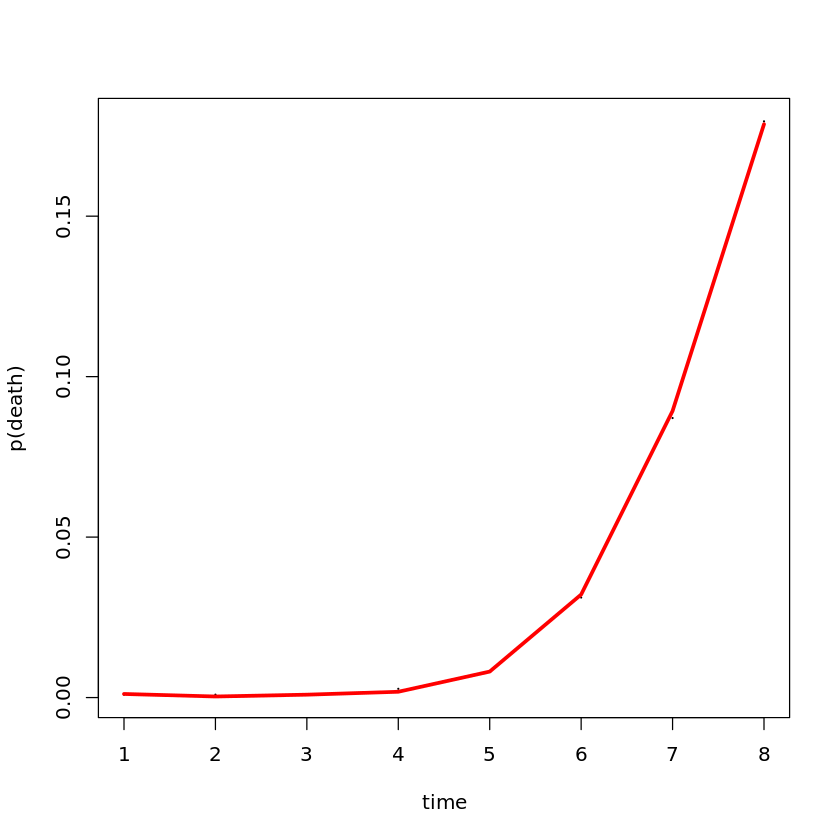

In [9]:
voutcome<-"case_status"
# train a model with optimal hyperparameters
best_model<-sdgm::lgbm.bestmodel.bin(full_data, voutcome, tune=F)

v.pdp<-"age_group"
x<-unique(full_data[,v.pdp])
yhat<-sapply(x, function(val)
{
  newdata<-full_data
  newdata[, v.pdp] <- val
  preds<-predict(best_model, newdata)
  mean(preds, na.rm=T)
})

plot.data<-data.frame(yhat=yhat, x=x)
lw1 <- loess(yhat ~ x,data=plot.data)
plot(x, yhat,pch=19,cex=0.1, xlab="time", ylab="p(death)")

j <- order(plot.data$x)
lines(plot.data$x[j],lw1$fitted[j],col="red",lwd=3)

## Show the plot on test data

[1] "case_status"   "age_group"     "gender"        "date_reported"
[5] "exposure"      "health_region"
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.038690 -> initscore=-3.212728
[LightGBM] [Info] Start training from score -3.212728
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.037865 -> initscore=-3.235125
[LightGBM] [Info] Start training from score -3.235125
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.037767 -> initscore=-3.237822
[LightGBM] [Info] Start training from score -3.237822
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.038650 -> initscore=-3.213784
[LightGBM] [Info] Start training from score -3.213784
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.038611 -> initscore=-3.214841
[LightGBM] [Info] Start training from score -3.214841


Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“span too small.   fewer data values than degrees of freedom.”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 0.99”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 1.01”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 1.0201”


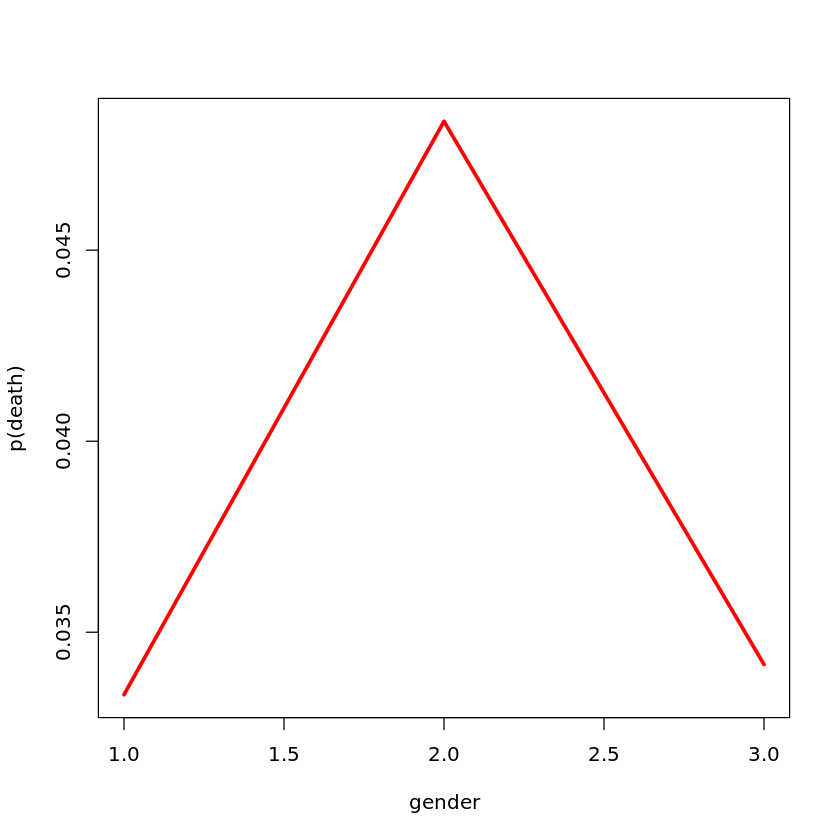

In [11]:
voutcome<-"case_status"

idx<-splitTools::partition(full_data[,voutcome], p=c(train=0.7, test=0.3), type="stratified")
train_data <- full_data[idx$train,] 
test_data <- full_data[idx$test,]

# train a model with optimal hyperparameters
best_model<-sdgm::lgbm.bestmodel.bin(train_data, voutcome, tune=F)

v.pdp<-"gender"
x<-unique(test_data[,v.pdp])
yhat<-sapply(x, function(val)
{
  newdata<-test_data
  newdata[, v.pdp] <- val
  preds<-predict(best_model, newdata)
  mean(preds, na.rm=T)
})

plot.data<-data.frame(yhat=yhat, x=x)
lw1 <- loess(yhat ~ x,data=plot.data)
plot(x, yhat,pch=19,cex=0.1, xlab="gender", ylab="p(death)")

j <- order(plot.data$x)
lines(plot.data$x[j],lw1$fitted[j],col="red",lwd=3)